# Neural Network–based Solver for Convection–Diffusion Equation
#### Implemented in DeepXDE with PyTorch Backend

Solving a **1D steady convection–diffusion equation** using **DeepXDE**.

### PDE
$$ \LARGE -\varepsilon u''(x) + b u'(x) = f(x), \quad x \in (0,1) $$

### Boundary Conditions
$$ \LARGE u(0) = 0, \quad u(1) = 0 $$


In [ ]:

import deepxde as dde
import numpy as np
import torch
import matplotlib.pyplot as plt

Using backend: pytorch


In [ ]:
# PDE parameters
epsilon = 0.01
b = 1.0

def source_term(x):
    return 1.0

# Define PDE residual
def pde(x, u):
    du_x = dde.grad.jacobian(u, x)
    d2u_xx = dde.grad.hessian(u, x)
    return -epsilon * d2u_xx + b * du_x - 1.0




| Code               | Mathematical Meaning |
|--------------------|----------------------|
| `jacobian(u, x)`   | $$ \dfrac{du}{dx} = u'(x) $$ |
| `hessian(u, x)`    | $$ \dfrac{d^2u}{dx^2} = u''(x) $$ |
| return value       | PDE residual |


### Geometry and Boundary Conditions

In [ ]:
geom = dde.geometry.Interval(0.0, 1.0)

bc = dde.icbc.DirichletBC(
    geom,
    lambda x: 0.0,
    lambda x, on_boundary: on_boundary,
)


### Generating Data

In [ ]:

def exact_solution(x):
    return x * (1 - x)

# %%
data = dde.data.PDE(
    geom,
    pde,
    bc,
    num_domain=100,
    num_boundary=2,
    solution=exact_solution,
    num_test=100
)

### Neural Network Architecture




In [ ]:
layer_sizes = [1, 32, 32, 32, 1]
net = dde.nn.FNN(layer_sizes, "tanh", "Glorot normal")

### Model Compilation and Training

In [6]:
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

losshistory, train_state = model.train(epochs=3000)

Compiling model...
'compile' took 1.036219 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.10e-01, 4.05e-02]    [5.11e-01, 4.05e-02]    []  
1000      [4.02e-02, 1.60e-01]    [4.02e-02, 1.60e-01]    []  
2000      [4.01e-02, 1.60e-01]    [4.02e-02, 1.60e-01]    []  
3000      [4.00e-02, 1.60e-01]    [4.02e-02, 1.60e-01]    []  

Best model at step 3000:
  train loss: 2.00e-01
  test loss: 2.00e-01
  test metric: []

'train' took 4.573077 s




### Solution Visualization

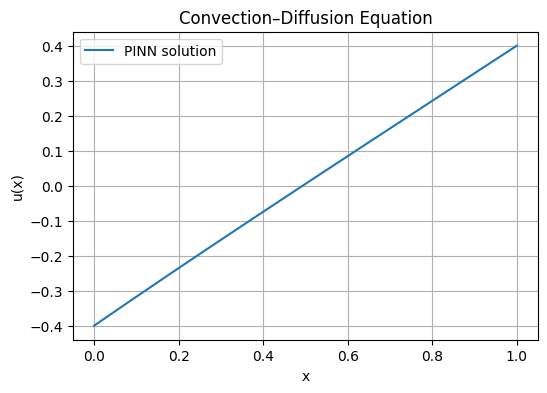

In [7]:
x = np.linspace(0, 1, 200).reshape(-1, 1)
u_pred = model.predict(x)

plt.figure(figsize=(6, 4))
plt.plot(x, u_pred, label="PINN solution")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Convection–Diffusion Equation")
plt.legend()
plt.grid(True)
plt.show()